<a href="https://colab.research.google.com/github/EsteArgen/Tarea-2-An-lisis-Num-rico-/blob/main/TAREA_2_A_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **😀PORTADA😀**

<center>
  

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**

## **Mètodo de Mìnimos Cuadrados**

## **Asignatura**

  Anàlisis Numèrico

## **Profesor**
  Manuela Bastidas Olivares

## **Estudiantes**
 Maria Paula Ardila Otero

 Mateo Cañavera Aluma

 David Esteban Martin Acosta


## **Universidad Nacional de Colombia**
## **Sede Medellín**
## **2024 - 2**

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**


</center>

# **🧠Teoría de los Mínimos Cuadrados🧠**

## **🤯Conceptos previos😵‍💫**





<div align="justify">

**🎗️Subespacios🎗️**

Trabajamos sobre el espacio vectorial $V = \mathbb{R}^n $. Comenzamos con el concepto de subespacio lineal.

**DEFINICIÓN (Subespacio lineal)** Un subespacio lineal de $\mathbb{R}^n$ es un subconjunto $ U \subseteq \mathbb{R}^n$ que está cerrado bajo la suma de vectores y la multiplicación por escalares. Es decir, para todo $u_1, u_2 \in U $ y $\alpha \in \mathbb{R}$, se cumple que:

$$u_1 + u_2 \in U \quad \text{y} \quad \alpha u_1 \in U.$$

Se sigue de esta condición que \$ 0 \in U$.

Alternativamente, podemos verificar estas condiciones demostrando que:

- (1) $ 0 \in U$
- (2) $u_1, u_2 \in U$

$\alpha \in \mathbb{R}$ implican que $\alpha u_1 + u_2 \in U$. De hecho, al tomar $\alpha = 1$ se cumple la primera condición anterior, mientras que al elegir $u_2 = 0$ se obtiene la segunda.


**Ejemplo**: El plano $P$ formado por todos los puntos $(x, y, z) \in \mathbb{R}^3$ que satisfacen $z = x + y$ es un subespacio lineal. De hecho, $0 = 0 + 0$ por lo que $(0, 0, 0) \in P$. Y, para cualquier $u_1 = (x_1, y_1, z_1)$y $u_2 = (x_2, y_2, z_2)$ tales que $z_1 = x_1 + y_1$ y $z_2 = x_2 + y_2$ y para cualquier $\alpha \in \mathbb{R}$, tenemos que:

$$
\alpha z_1 + z_2 = \alpha(x_1 + y_1) + (x_2 + y_2) = (\alpha x_1 + x_2) + (\alpha y_1 + y_2).
$$

Es decir, $\alpha u_1 + u_2$ satisface la condición que define a $P$ y por lo tanto, está en $P$. Nota también que $P$ pasa por el origen.

En este ejemplo, el subespacio lineal $P$ puede describirse alternativamente como la colección de cada vector de la forma $(x, y, x + y)$.


</div>

### **📦IMPORTACIONES📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import ConnectionPatch
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats

**👩‍💻 IMPLEMENTACIÓN 🧑‍💻**

In [ ]:

x = np.linspace(0,1,num=101)
y = np.linspace(0,1,num=101)

In [ ]:

X, Y = np.meshgrid(x, y)

In [ ]:

X

array([[0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       ...,
       [0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ]])

In [ ]:

Z = X + Y

In [ ]:

Z

array([[0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.01, 0.02, 0.03, ..., 0.99, 1.  , 1.01],
       [0.02, 0.03, 0.04, ..., 1.  , 1.01, 1.02],
       ...,
       [0.98, 0.99, 1.  , ..., 1.96, 1.97, 1.98],
       [0.99, 1.  , 1.01, ..., 1.97, 1.98, 1.99],
       [1.  , 1.01, 1.02, ..., 1.98, 1.99, 2.  ]])

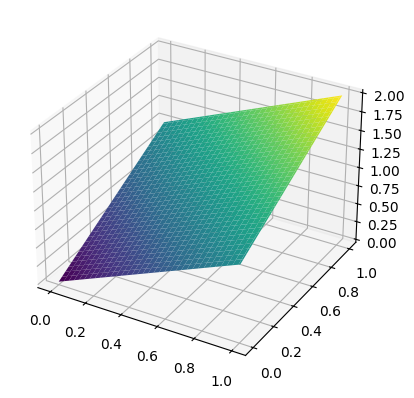

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

<div align="justify">

**DEFINICIÓN (Espacio generado)** Sea $w_1, \dots, w_m \in \mathbb{R}^n$. El espacio generado por $\{w_1, \dots, w_m\}$, denotado como $\text{span}(w_1, \dots, w_m)$, es el conjunto de todas las combinaciones lineales de los $w_j$'s. Es decir:

$$
\text{span}(w_1, \dots, w_m) = \left\{ \sum_{j=1}^{m} \alpha_j w_j : \alpha_1, \dots, \alpha_m \in \mathbb{R} \right\}.
$$

Por convención, declaramos que el espacio generado por la lista vacía es $\{0\}$.

**EJEMPLO (continuación)** En el ejemplo anterior, notamos que el plano $P$ es la colección de cada vector de la forma $(x, y, x + y)$. Estos se pueden escribir como $ x w_1 + y w_2 $, donde $w_1 = (1, 0, 1)$ y $ w_2 = (0, 1, 1)$ , y viceversa. Por lo tanto, $P = \text{span}(w_1, w_2) $.

Comprobamos a continuación que el espacio generado es efectivamente un subespacio lineal.






</div>

<div align="justify">

**LEMA** Sea $W = \text{span}(w_1, \dots, w_m)$. Entonces, $W$ es un subespacio lineal.

Decimos que $w_1, \dots, w_m$ generan $W$.

**Prueba**: Primero, $0 = \sum_{j=1}^{m} 0 w_j \in W$. Segundo, sean $u_1, u_2 \in W$ y $\alpha \in \mathbb{R}$. Para $i = 1, 2$, como $u_i$ está en el espacio generado por los $w_j$'s, podemos escribir:

$$
u_i = \sum_{j=1}^{m} \beta_{ij} w_j
$$

para algunos $\beta_{ij} \in \mathbb{R}$ para $j = 1, \dots, m$.

Por lo tanto,

$$
\alpha u_1 + u_2 = \alpha \sum_{j=1}^{m} \beta_{1j} w_j + \sum_{j=1}^{m} \beta_{2j} w_j = \sum_{j=1}^{m} (\alpha \beta_{1j} + \beta_{2j}) w_j.
$$

Así que $\alpha u_1 + u_2 \in W$.




</div>

<div align="justify">

**DEFINICIÓN (Espacio columna)** Sea $A \in \mathbb{R}^{n \times m} $ una matriz de $ n \times m $ con columnas $a_1, \dots, a_m \in \mathbb{R}^n $. El espacio columna de $A $, denotado como $\text{col}(A) $, es el espacio generado por las columnas de $A $, es decir,

$$
\text{col}(A) = \text{span}(a_1, \dots, a_m).
$$

Cuando se piensa en $A$ como una matriz lineal, es decir, la función valor-vector $f(x) = Ax$ que mapea entradas en $ \mathbb{R}^m $ a salidas en $ \mathbb{R}^n $, el espacio columna se denomina el rango o la imagen.

Necesitaremos otro subespacio lineal importante definido en términos de una matriz.

**DEFINICIÓN (Espacio nulo)** Sea \( B \in \mathbb{R}^{n \times m} \). El espacio nulo de \( B \) es el subespacio lineal

$$
\text{null}(B) = \{x \in \mathbb{R}^m : Bx = 0\}.
$$

</div>

<div align="justify">

**DEFINICIÓN (Independencia lineal)** Una lista de vectores no nulos $u_1, \dots, u_m $ es linealmente independiente si ninguno de ellos puede ser escrito como una combinación lineal de los otros, es decir,

$$
\forall i, \ u_i \notin \text{span}(\{ u_j : j \neq i \}).
$$


**LEMA (Definición equivalente de independencia lineal)** Los vectores $u_1, \dots, u_m $ son linealmente independientes si y solo si

$$
\sum_{j=1}^{m} \alpha_j u_j = 0 \quad \Rightarrow \quad \alpha_j = 0, \quad \forall j.
$$

Equivalente a esto, $ u_1, \dots, u_m $ son linealmente dependientes si y solo si existen $ \alpha_j $'s, no todos cero, tales que

$$
\sum_{j=1}^{m} \alpha_j u_j = 0.
$$

**Prueba**: Probaremos la segunda afirmación.

Supongamos que $u_1, \dots, u_m $ son linealmente dependientes. Entonces $u_i = \sum_{j \neq i} \alpha_j u_j$ para algún $i$. Tomando $\alpha_i = -1$ obtenemos

$$
\sum_{j=1}^{m} \alpha_j u_j = 0.
$$

Supongamos que $\sum_{j=1}^{m} \alpha_j u_j = 0$ con $\alpha_j $'s no todos cero. En particular, $\alpha_i \neq 0$ para algún $i$. Entonces,

$$
u_i = - \frac{1}{\alpha_i} \sum_{j \neq i} \alpha_j u_j = \sum_{j \neq i} \left( - \frac{\alpha_j}{\alpha_i} \right) u_j.
$$

------------------------------------------------------------------------------

En forma de matriz: sea $a_1, \dots, a_m \in \mathbb{R}^n$ y forme la matriz cuyas columnas son los $a_i $'s

<center>

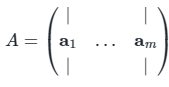

</center>

Es importante notar que $Ax$ es la siguiente combinación lineal de las columnas de $$
A: \sum_{j=1}^{m} x_j a_j
$$

Por lo tanto, $a_1, \dots, a_m$ son linealmente independientes si y solo si $Ax = 0 \Rightarrow x = 0$. En términos del espacio nulo de $A$, esta última condición se traduce en $\text{null}(A) = \{0\}$.

Equivalente a esto, $a_1, \dots, a_m$ son linealmente dependientes si y solo si existe $x \neq 0$ tal que $Ax = 0$. Dicho de otra manera, esta última condición significa que existe un vector no nulo en el espacio nulo de $A$.


**DEFINICIÓN (Base)** Sea $U$ un subespacio lineal de $\mathbb{R}^n$. Una base de $U$ es una lista de vectores $u_1, \dots, u_m$ en $U$ tal que:

- (1) $span\ U$, es decir, $U = span(u_1, \dots, u_m)$;
- (2) son linealmente independientes.

Denotamos por $e_1, \dots, e_n$ la base estándar de $\mathbb{R}^n$, donde $e_i$ tiene un uno en la coordenada $i$ y ceros en todas las demás coordenadas. La base del subespacio lineal $\{0\}$ es la lista vacía (que, por convención, es independiente y tiene $span(\{0\})$).




</div>

<div align="justify">

**TEOREMA (Dimensión)** Sea $U \neq \{0\}$ un subespacio lineal de $\mathbb{R}^n$. Entonces, todas las bases de $U$ tienen el mismo número de elementos. Llamamos a este número la dimensión de $U$ y lo denotamos por $dim(U)$.

La prueba se proporciona a continuación. Se basa en el **Lema de Dependencia Lineal**. Ese lema fundamental tiene muchas implicaciones útiles, algunas de las cuales se exponen ahora.

Una lista de vectores linealmente independientes en un subespacio $U$ se denomina lista independiente en $U$. Una lista de vectores cuyo span es $U$ se denomina lista generadora de $U$. En los siguientes lemas, $U$ es un subespacio de $\mathbb{R}^n$. El primer y segundo lemas los probaremos más adelante. El **Teorema de la Dimensión** sigue inmediatamente del primer lema (¿Por qué?).

**LEMA (La lista independiente es más corta que la generadora)** La longitud de cualquier lista independiente en $U$ es menor o igual que la longitud de cualquier lista generadora de $U$.

**LEMA (Completando una lista independiente)** Cualquier lista independiente en $U$ puede completarse hasta convertirse en una base de $U$.

**LEMA (Reducción de una lista generadora)** Cualquier lista generadora de $U$ puede reducirse a una base de $U$.

**DEFINICIÓN (Espacio fila)** El espacio fila de $A \in \mathbb{R}^{n \times m}$, denotado como $row(A)$, es el span de las filas de $A$ como vectores en $\mathbb{R}^m$.

Observa que el espacio fila de $A$ es igual al espacio columna de su transpuesta $A^T$. Como resulta, estas dos nociones de rango son iguales. Por lo tanto, nos referimos al rango de fila y al rango columna de $A$ simplemente como el rango, que denotamos por $rk(A)$.

**TEOREMA (Rango fila igual a rango columna)** Para cualquier $A \in \mathbb{R}^{n \times m}$, el rango fila de $A$ es igual al rango columna de $A$. Además, $rk(A) \leq \min\{n, m\}$.


**Lema de dependencia lineal y sus implicaciones** Damos una prueba del **Teorema de la Dimensión**. La prueba se basa en un lema fundamental. Establece que siempre podemos eliminar un vector de una lista de vectores linealmente dependientes sin cambiar su span.


**LEMA (Dependencia lineal)** Sea $u_1, \dots, u_m$ una lista de vectores linealmente dependientes con $u_1 \neq 0$. Entonces, existe un $i$ tal que:

1. $u_i \in span(u_1, \dots, u_{i-1})$.
2. $span(\{u_j : j \in [m]\}) = span(\{u_j : j \in [m], j \neq i\})$.

**Idea de la prueba (Dependencia lineal)** Por dependencia lineal, $0$ puede escribirse como una combinación lineal no trivial de los $u_j$. Entonces, el índice $i$ en 1 es el índice más grande con coeficiente no nulo.

**Prueba (Dependencia lineal)** Para 1., por dependencia lineal, $\sum_{j=1}^{m} \alpha_j u_j = 0$, con los $\alpha_j$ no todos cero. Además, dado que $u_1 \neq 0$, no todos los $\alpha_2, \dots, \alpha_m$ son cero (¿por qué?). Tomamos el índice más grande entre los $\alpha_j$ que son no nulos, digamos $i$. Luego, reorganizando la expresión anterior y utilizando el hecho de que $\alpha_j = 0$ para $j > i$, se tiene

$$
u_i = - \sum_{j=1}^{i-1} \frac{\alpha_j}{\alpha_i} u_j \in span(u_1, \dots, u_{i-1}).
$$

Para 2., notamos que para cualquier $w \in span(\{u_j : j \in [m]\})$, podemos escribirlo como $w = \sum_{j=1}^{m} \beta_j u_j$, y podemos reemplazar $u_i$ por la ecuación anterior, produciendo una representación de $w$ en términos de $\{u_j : j \in [m], j \neq i\}$.


Antes de demostrar el **Teorema de la Dimensión**, utilizamos el **Lema de Dependencia Lineal** para probar una afirmación clave.

**Prueba: (La lista independiente es más corta que la lista generadora)** Sea $\{u_j : j \in [m]\}$ una lista independiente en $U$ y sea $\{w_i : i \in [m']\}$ una lista generadora de $U$. Primero, considere la nueva lista $\{u_1, w_1, \dots, w_m'\}$. Como los $w_i$ son generadores, agregar $u_1 \neq 0$ necesariamente produce una lista linealmente dependiente. Por el **Lema de Dependencia Lineal**, podemos eliminar uno de los $w_i$ sin cambiar el span. La nueva lista $B$ tiene longitud $m'$. Luego, agregamos $u_2$ a $B$ inmediatamente después de $u_1$. Por el **Lema de Dependencia Lineal**, uno de los vectores de esta lista está en el span de los anteriores. No puede ser $u_2$ ya que $\{u_1, u_2\}$ son linealmente independientes por la suposición. Entonces, debe ser uno de los $w_i$ restantes. Lo eliminamos sin cambiar el span, aplicando el **Lema de Dependencia Lineal** nuevamente. Este proceso se puede continuar hasta que hayamos agregado todos los $u_j$, ya que de lo contrario tendríamos una contradicción en el argumento anterior. Por lo tanto, debe haber al menos tantos $w_i$ como $u_j$.

**Prueba: (Dimensión)** Sea $\{b_j : j \in [m]\}$ y $\{b_j' : j \in [m']\}$ las dos bases de $U$. Debido a que ambas forman listas independientes y generadoras, el **Lema de la lista independiente es más corta que la lista generadora** implica que cada una tiene una longitud menor o igual a la otra. Por lo tanto, sus longitudes deben ser iguales. Esto prueba la afirmación.

**Prueba: (Completando una lista independiente)** Sea $\{u_j : j \in [l]\}$ una lista independiente en $U$. Sea $\{w_i : i \in [m]\}$ una lista generadora de $U$, que existe por el **Lema de la existencia de una lista generadora**. Agregue los vectores de la lista generadora uno por uno a la lista independiente si no están en el span de la lista previamente construida (o descártelos de otra manera). Por el **Lema de Dependencia Lineal**, la lista permanece independiente en cada paso. Después de $m$ pasos, la lista resultante abarca todos los $w_i$'s. Por lo tanto, abarca $U$ y es linealmente independiente, es decir, es una base de $U$.

</div>

<div align="justify">

**DEFINICIÓN (Matriz no singular)** Una matriz cuadrada $A \in \mathbb{R}^{n \times n}$ es no singular si y solo si tiene rango completo de columnas.

Una implicación de esto es que $A$ es no singular si y solo si sus columnas forman una base de $\mathbb{R}^n$. De hecho, supongamos que las columnas de $A$ forman una base de $\mathbb{R}^n$. Entonces, la dimensión de $col(A)$ es $n$. En la otra dirección, supongamos que $A$ tiene rango completo de columnas.

1. Primero probamos una afirmación general: las columnas de $Z \in \mathbb{R}^{k \times m}$ forman una base de $col(Z)$ siempre que $Z$ tenga rango completo de columnas. De hecho, las columnas de $Z$ por definición abarcan $col(Z)$. Por el **Lema de reducción de una lista generadora**, pueden ser reducidas a una base de $col(Z)$. Si $Z$ tiene rango completo de columnas, entonces la longitud de cualquier base de $col(Z)$ es igual al número de columnas de $Z$. Por lo tanto, las columnas de $Z$ deben ya formar una base.

2. Aplicamos la afirmación anterior a $Z = A$. Entonces, dado que las columnas de $A$ forman una lista independiente en $\mathbb{R}^n$, por el **Lema de completado de una lista independiente**, se pueden completar hasta formar una base de $\mathbb{R}^n$. Pero ya hay $n$ de ellas, la dimensión de $\mathbb{R}^n$, por lo que ya deben formar una base de $\mathbb{R}^n$. En otras palabras, hemos demostrado otro hecho general: una lista independiente de longitud $n$ en $\mathbb{R}^n$ es una base de $\mathbb{R}^n$.

Equivalente a esto:

**LEMA (Inversibilidad)** Una matriz cuadrada $A \in \mathbb{R}^{n \times n}$ es no singular si y solo si existe una única matriz $A^{-1}$ tal que

$$
AA^{-1} = A^{-1}A = I_{n \times n}.
$$

La matriz $A^{-1}$ se denomina la inversa de $A$. También decimos que $A$ es invertible.

**Idea de la prueba**: Usamos la no singularidad de $A$ para escribir las columnas de la matriz identidad como combinaciones lineales únicas de las columnas de $A$.

**Prueba**: Supongamos primero que $A$ tiene rango completo de columnas. Entonces, sus columnas son linealmente independientes y forman una base de $\mathbb{R}^n$. En particular, para cualquier vector base estándar $e_i$ se puede escribir como una combinación lineal única de las columnas de $A$, es decir, existe un $b_i$ tal que $Ab_i = e_i$. Sea $B$ la matriz con columnas $b_i$, $i = 1, \dots, n$. Por construcción, $AB = I_{n \times n}$. Aplicando la misma idea a las filas de $A$ (por el **Lema de igualdades de rango columna** que también forma una base de $\mathbb{R}^n$), existe una única matriz $C$ tal que

$$
C = CAB = I_{n \times n}B = B.
$$

Por lo tanto, tomamos $A^{-1} = B = C$.

En la otra dirección, siguiendo el mismo argumento, la ecuación $A^{-1} = I_{n \times n}$ implica que la base estándar de $\mathbb{R}^n$ está en el espacio columna de $A$. Por lo tanto, las columnas de $A$ forman una lista generadora de todo $\mathbb{R}^n$ y $rk(A) = n$. Eso prueba la afirmación.

**TEOREMA (Invertir un sistema no singular)** Sea $A \in \mathbb{R}^{n \times n}$ una matriz cuadrada no singular. Entonces, para cualquier $b \in \mathbb{R}^n$, existe un único $x \in \mathbb{R}^n$ tal que $Ax = b$. Además, $x = A^{-1}b$.

**Prueba**: La primera afirmación sigue inmediatamente del hecho de que las columnas de $A$ forman una base de $\mathbb{R}^n$. Para la segunda afirmación, note que

$$
x = A^{-1}Ax = A^{-1}b.
$$




</div>

## **😎Perspectiva geométrica🤓**

<div align="justify">

Consideramos el siguiente problema: se nos da $A \in \mathbb{R}^{n \times m}$ una matriz de tamaño $n \times m$ y $b \in \mathbb{R}^n$ un vector. Queremos resolver el sistema $Ax \approx b$. En el caso especial donde $A$ es invertible, existe una solución exacta y única. Sin embargo, en general, una solución puede no existir o no ser única. Nos centramos en el caso sobredeterminado donde ocurre genéricamente la primera situación. Comenzamos revisando el concepto de ortogonalidad.
</div>

<div align="justify">


**DEFINICIÓN (Ortogonalidad)** Los vectores $u$ y $v$ en $\mathbb{R}^n$ (como vectores columna) son ortogonales si su producto interno es cero:

$$
\langle u, v \rangle = u^T v = \sum_{i=1}^{n} u_i v_i = 0.
$$

La ortogonalidad tiene importantes implicaciones. El siguiente resultado clásico será útil a continuación. A lo largo del texto, usamos $\|u\|$ para la norma euclidiana de $u$.

**TEOREMA (Pitágoras)** Sean $u, v \in \mathbb{R}^n$ ortogonales. Entonces,

$$
\|u + v\|^2 = \|u\|^2 + \|v\|^2.
$$

**Prueba**: Usando $\|w\|^2 = \langle w, w \rangle$, obtenemos

$$
\|u + v\|^2 = \langle u + v, u + v \rangle = \langle u, u \rangle + 2 \langle u, v \rangle + \langle v, v \rangle = \|u\|^2 + \|v\|^2.
$$

Una aplicación del Teorema de Pitágoras es una prueba de la **Desigualdad de Cauchy-Schwarz**.

**Prueba**: (Cauchy-Schwarz) Sea $q = \frac{v}{\|v\|}$ el vector unitario en la dirección de $v$. Queremos demostrar que $|\langle u, q \rangle| \leq \|u\|$. Descomponemos $u$ de la siguiente forma:

$$
u = \langle u, q \rangle q + \{u - \langle u, q \rangle q\}.
$$

Los dos términos en el lado derecho son ortogonales:

$$
\langle \langle u, q \rangle q, u - \langle u, q \rangle q \rangle = \langle u, q \rangle^2 - \langle u, q \rangle^2 \langle q, q \rangle = 0.
$$

Entonces, Pitágoras da:

$$
\|u\|^2 = \|\langle u, q \rangle q\|^2 + \|u - \langle u, q \rangle q\|^2 \geq \|\langle u, q \rangle q\|^2 = \langle u, q \rangle^2.
$$

Tomando la raíz cuadrada, se obtiene la afirmación.

**Expansión de base ortonormal** Para comenzar a ver el poder de la ortogonalidad, consideremos lo siguiente. Una lista de vectores $\{u_1, \dots, u_m\}$ es una lista ortonormal si los $u_i$ son ortogonales entre sí y cada uno tiene norma 1, es decir, para todo $i$ y $j \neq i$, tenemos que $\|u_i\| = 1$ y $\langle u_i, u_j \rangle = 0$.

Alternativamente,

$$
\langle u_i, u_j \rangle =
\begin{cases}
1 & \text{si } i = j \\
0 & \text{si } i \neq j
\end{cases}
$$

**LEMA (Propiedades de las listas ortonormales)** Sea $\{u_1, \dots, u_m\}$ una lista ortonormal. Entonces:

1. Para cualquier $\alpha_j \in \mathbb{R}$, $j = 1, \dots, m$, tenemos

$$
\left\| \sum_{j=1}^{m} \alpha_j u_j \right\|^2 = \sum_{j=1}^{m} \alpha_j^2.
$$

2. Los vectores $\{u_1, \dots, u_m\}$ son linealmente independientes.

**Prueba**: Para el primer caso, usando que $\|x\|^2 = \langle x, x \rangle$, tenemos

$$
\left\| \sum_{j=1}^{m} \alpha_j u_j \right\|^2 = \left\langle \sum_{i=1}^{m} \alpha_i u_i, \sum_{j=1}^{m} \alpha_j u_j \right\rangle
= \sum_{i=1}^{m} \alpha_i \left\langle u_i, \sum_{j=1}^{m} \alpha_j, u_j\right\rangle
= \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_i \alpha_j \langle u_i, u_j \rangle
= \sum_{i=1}^{m} \alpha_i^2.
$$

Donde usamos ortogonalidad en la última ecuación, es decir, $\langle u_i, u_j \rangle = 1$ si $i = j$ y 0 en caso contrario.

Para el segundo caso, supongamos que $\sum_{i=1}^{m} \beta_i u_i = 0$, entonces debemos tener que 1. $\sum_{i=1}^{m} \beta_i^2 = 0$ para todo $i$. Por lo tanto, $\beta_i = 0$ para todos los $i$. En consecuencia, los $u_i$ son linealmente independientes.

Dada una base $\{u_1, \dots, u_m\}$ de $U$, sabemos que: para cualquier $w \in U$, existe una combinación lineal $w = \sum_{i=1}^{m} \alpha_i u_i$. No es inmediatamente obvio en general cómo encontrar los $\alpha_i$. En el caso ortonormal, sin embargo, existe una fórmula. Decimos que la base $\{u_1, \dots, u_m\}$ es ortonormal si forma una lista ortonormal.


**TEOREMA (Expansión ortonormal)** Sea $q_1, \dots, q_m$ una base ortonormal de $U$ y sea $w \in U$. Entonces,

$$
w = \sum_{j=1}^{m} \langle w, q_j \rangle q_j.
$$

**Prueba**: Dado que $w \in U$, podemos escribir $w = \sum_{i=1}^{m} \alpha_i q_i$ para algunos $\alpha_i$. Tomamos el producto interno con $q_j$ y usamos ortogonalidad:

$$
\langle w, q_j \rangle = \left\langle \sum_{i=1}^{m} \alpha_i q_i, q_j \right\rangle = \sum_{i=1}^{m} \alpha_i \langle q_i, q_j \rangle = \alpha_j.
$$

Por lo tanto, hemos determinado todos los $\alpha_j$ en la expansión de base de $w$.


**Gram-Schmidt** Hemos mostrado que trabajar con bases ortonormales es deseable. ¿Qué pasa si no tenemos una? Revisaremos el algoritmo de **Gram-Schmidt** en secciones posteriores, lo cual implicará que todo subespacio lineal tiene una base ortonormal.

**TEOREMA (Gram-Schmidt)** Sea $a_1, \dots, a_m$ linealmente independiente. Entonces, existe una base ortonormal $q_1, \dots, q_m$ de $span(a_1, \dots, a_m)$.


</div>

<div align="justify">

**Proyección ortogonal**

Para resolver el caso sobredeterminado, es decir, cuando $n > m$, consideramos el siguiente problema más general. Tenemos un subespacio lineal $U \subseteq \mathbb{R}^n$ y un vector $v \notin U$. Queremos encontrar el vector $p \in U$ que esté más cercano a $v$ en norma euclidiana, es decir, queremos resolver

$$
\min_{p \in U} \|p - v\|.
$$

**DEFINICIÓN (Proyección ortogonal sobre una lista ortonormal)** Sea $q_1, \dots, q_m$ una lista ortonormal. La proyección ortogonal de $v \in \mathbb{R}^n$ sobre $\{q_i\}_{i=1}^m$ se define como

$$
\text{proj}_{\{q_i\}_{i=1}^m} v = \sum_{j=1}^{m} \langle v, q_j \rangle q_j.
$$


**TEOREMA (Proyección ortogonal)** Sea $U \subseteq V$ un subespacio lineal y $v \in \mathbb{R}^n$. Entonces:

a) Existe una solución única $p^*$ para

$$
\min_{p \in U} \|p - v\|.
$$

La denotamos por $p^* = \text{proj}_U v$ y la referimos como la proyección ortogonal de $v$ sobre $U$.

b) La solución $p^*$ está caracterizada geométricamente por

$$
(*) \langle v - p^*, u \rangle = 0, \quad \forall u \in U.
$$

c) Para cualquier base ortonormal $q_1, \dots, q_m$ de $U$,

$$
\text{proj}_U v = \text{proj}_{\{q_i\}_{i=1}^m} v.
$$

**Prueba**: Sea $p^*$ cualquier vector en $U$ que satisface $(\ast)$. Primero mostramos que necesariamente satisface

$$
(**) \|p^* - v\| \leq \|p - v\|, \quad \forall p \in U.
$$

Note que para cualquier $p \in U$ el vector $u = p - p^*$ está también en $U$. De esta forma, por $(*)$ y por el **Teorema de Pitágoras**,

$$
\|p - v\|^2 = \|p - p^* + p^* - v\|^2 = \|p - p^*\|^2 + \|p^* - v\|^2 \geq \|p^* - v\|^2.
$$

Además, la igualdad solo se da si $\|p - p^*\|^2 = 0$, lo que ocurre solo si $p = p^*$. Por lo tanto, si existe tal vector $p^*$, es único.

Ahora falta demostrar que existe al menos un vector en $U$ que satisface $(\ast)$. Según el **Teorema de Gram-Schmidt**, el subespacio lineal $U$ tiene una base ortonormal $q_1, \dots, q_m$. Por definición, $\text{proj}_{\{q_i\}_{i=1}^m} v \in \text{span}(\{q_i\}_{i=1}^m) = U$. Mostramos que $\text{proj}_{\{q_i\}_{i=1}^m} v$ satisface $(\ast)$. Podemos escribir cualquier $u \in U$ como $\sum_{i=1}^{m} \alpha_i q_i$ con $\alpha_i = \langle u, q_i \rangle$. Entonces, usando esta representación, obtenemos

$$
\left\langle v - \sum_{j=1}^{m} \langle v, q_j \rangle q_j, \sum_{i=1}^{m} \alpha_i q_i \right\rangle = \sum_{j=1}^{m} \langle v, q_j \rangle \alpha_j - \sum_{j=1}^{m}\sum_{i=1}^{m} \alpha_i \langle v, q_j \rangle \langle q_j, q_i \rangle
= \sum_{j=1}^{m} \langle v, q_j \rangle \alpha_j - \sum_{j=1}^{m} \alpha_j \langle v, q_j \rangle = 0,
$$

donde usamos la ortogonalidad de los $q_j$ en la segunda línea.

**DEFINICIÓN (Matriz ortogonal)** Una matriz cuadrada $Q \in \mathbb{R}^{m \times m}$ es ortogonal si

$$
Q^T Q = Q Q^T = I_{m \times m}.
$$

**DEFINICIÓN (Complemento ortogonal)** Sea $U \subseteq \mathbb{R}^n$ un subespacio lineal. El complemento ortogonal de $U$, denotado como $U^\perp$, se define como

$$
U^\perp = \{ w \in \mathbb{R}^n : \langle w, u \rangle = 0, \ \forall u \in U \}.
$$

**LEMA (Descomposición ortogonal)** Sea $U \subseteq \mathbb{R}^n$ un subespacio lineal y $v \in \mathbb{R}^n$. Entonces, $v$ puede descomponerse como

$$
v = \text{proj}_U v + (v - \text{proj}_U v),
$$

donde $\text{proj}_U v \in U$ y $(v - \text{proj}_U v) \in U^\perp$. Además, esta descomposición es única en el siguiente sentido: si $v = u + u^\perp$ con $u \in U$ y $u^\perp \in U^\perp$, entonces

- $u = \text{proj}_U v$
- $u^\perp = v - \text{proj}_U v$.


**Prueba**: La primera parte es una consecuencia inmediata del **Teorema de la Proyección Ortogonal**. Para la segunda parte, supongamos que $v = u + u^\perp$ con $u \in U$ y $u^\perp \in U^\perp$. Restando $v = \text{proj}_U v + (v - \text{proj}_U v)$, obtenemos que

$$
(\ast) \quad 0 = w_1 + w_2,
$$

con

$$
w_1 = u - \text{proj}_U v \in U, \quad w_2 = u^\perp - (v - \text{proj}_U v) \in U^\perp.
$$

Si $w_1 = w_2 = 0$, hemos terminado. De lo contrario, ambos deben ser diferentes de cero. Además, por las **Propiedades de las Listas Ortonormales**, $w_1$ y $w_2$ deben ser linealmente independientes. Pero esto contradice el hecho de que $w_2 = -w_1$ por $(\ast)$.


</div>

<center>

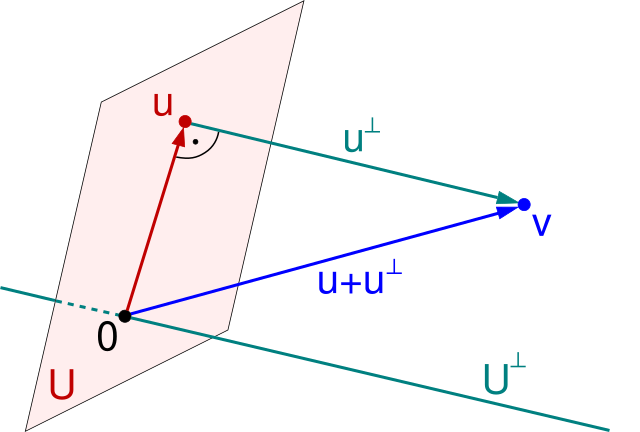



</center>

<div align="justify">

Formalmente, el **Lema de Descomposición Ortogonal** establece que $\mathbb{R}^n$ es una suma directa de cualquier subespacio lineal $U$ y de su complemento ortogonal $U^\perp$, es decir, cualquier vector $v \in \mathbb{R}^n$ puede escribirse de manera única como $v = u + u^\perp$ con $u \in U$ y $u^\perp \in U^\perp$. Esto se denota como

$$
\mathbb{R}^n = U \oplus U^\perp.
$$

Sea $a_1, \dots, a_\ell$ una base ortonormal de $U$ y $b_1, \dots, b_k$ una base ortonormal de $U^\perp$. Por definición del complemento ortogonal, la lista

$$
\mathcal{L} = \{a_1, \dots, a_\ell, b_1, \dots, b_k\}
$$

es ortonormal, por lo que forma una base de su span. Debido a que cualquier vector en $\mathbb{R}^n$ puede escribirse como una suma de un vector de $U$ y un vector de $U^\perp$, todo $\mathbb{R}^n$ está en el span de $\mathcal{L}$. Se sigue del **Teorema de la Dimensión** que $n = \ell + k$, es decir,

$$
\dim(U) + \dim(U^\perp) = n.
$$




</div>

**😱REPRESENTACIÓN VISUAL😲**

In [ ]:

class GeometricLeastSquares:
    def __init__(self):
        plt.style.use('bmh')

        self.fig = plt.figure(figsize=(15, 7))
        self.fig.patch.set_facecolor('white')
        self.ax1 = self.fig.add_subplot(121)
        self.ax2 = self.fig.add_subplot(122)
        np.random.seed(42)
        self.x = np.linspace(0, 10, 10)
        self.y = 2 * self.x + 1 + np.random.normal(0, 1.5, 10)
        self.X = np.vstack([np.ones_like(self.x), self.x]).T
        self.beta = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y
        self.y_pred = self.X @ self.beta
        self.setup_plots()

    def setup_plots(self):
        self.ax1.scatter(self.x, self.y, color='#1f77b4', s=100, alpha=0.7,label='Datos', zorder=3)
        self.ax1.set_xlabel('X', fontsize=12, fontweight='bold')
        self.ax1.set_ylabel('Y', fontsize=12, fontweight='bold')
        self.ax1.set_title('Espacio de Datos', fontsize=14, fontweight='bold', pad=20)
        self.ax1.grid(True, linestyle='--', alpha=0.7)
        self.ax1.set_axisbelow(True)
        x_line = np.array([0, 10])
        y_line = self.beta[0] + self.beta[1] * x_line
        self.ax1.plot(x_line, y_line, color='#d62728', linewidth=2.5,label='Línea de mejor ajuste', zorder=2)


        for i in range(len(self.x)):
            self.ax1.plot([self.x[i], self.x[i]],[self.y[i], self.y_pred[i]],color='#2ca02c', linestyle='--', alpha=0.4,linewidth=1.5, zorder=1)

        self.ax1.legend(fontsize=10, framealpha=0.9)

        y_normalized = self.y / np.linalg.norm(self.y)
        y_pred_normalized = self.y_pred / np.linalg.norm(self.y)
        residual = y_normalized - y_pred_normalized
        self.ax2.quiver(0, 0, y_normalized[0], y_normalized[1],angles='xy', scale_units='xy', scale=1,color='#1f77b4', width=0.008,label='Vector y', zorder=3)
        self.ax2.quiver(0, 0, y_pred_normalized[0], y_pred_normalized[1],angles='xy', scale_units='xy', scale=1,color='#d62728', width=0.008,label='Proyección', zorder=2)
        self.ax2.quiver(y_pred_normalized[0], y_pred_normalized[1],residual[0], residual[1],angles='xy', scale_units='xy', scale=1,color='#2ca02c', width=0.008,label='Residuo', zorder=1)
        self.ax2.set_xlim(-1.5, 1.5)
        self.ax2.set_ylim(-1.5, 1.5)
        self.ax2.set_aspect('equal')
        self.ax2.grid(True, linestyle='--', alpha=0.7)
        self.ax2.set_title('Espacio Vectorial', fontsize=14, fontweight='bold', pad=20)
        self.ax2.legend(fontsize=10, framealpha=0.9)
        self.ax2.spines['left'].set_position('zero')
        self.ax2.spines['bottom'].set_position('zero')
        self.ax2.spines['right'].set_visible(False)
        self.ax2.spines['top'].set_visible(False)
        self.ax2.set_xlabel('X', fontsize=12, fontweight='bold')
        self.ax2.set_ylabel('Y', fontsize=12, fontweight='bold')

        plt.figtext(0.02, 0.02,"La proyección ortogonal minimiza la suma de los cuadrados de las distancias",fontsize=11, style='italic',bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray',boxstyle='round,pad=0.5'))
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)

    def show(self):
        plt.show()


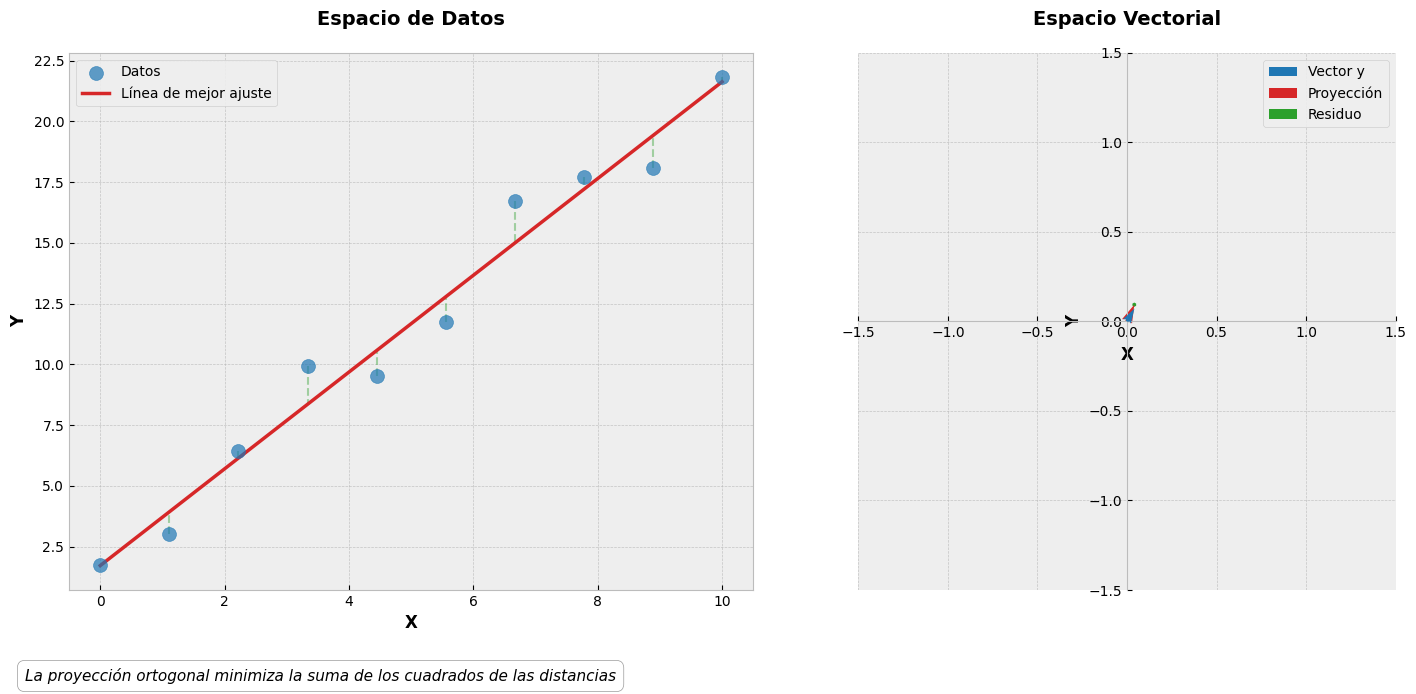

In [ ]:

GeometricLeastSquares().show()

<center>

## **🕎Perspectiva algebraica🔯**

<div align="justify">

Supongamos que tenemos un conjunto de datos $\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$, donde cada $x_i$ representa una variable independiente y $y_i$ es la variable dependiente asociada. Nuestro objetivo es encontrar una función que modele estos datos de manera que la distancia entre los valores predichos y los valores observados sea lo más pequeña posible.

En **regresión lineal simple**, la función que usamos para ajustar los datos es una recta de la forma:

$$
y = a_0 + a_1 x
$$

Donde:
- $a_0$ es el **intercepto** de la recta.
- $a_1$ es la **pendiente** de la recta.

Lo que queremos encontrar son los valores de $a_0$ y $a_1$ que minimicen el error cuadrático, es decir, que el error total (la diferencia entre los valores observados $y_i$ y los valores ajustados $\hat{y}_i$) sea lo más pequeño posible.

El **error** para un valor $x_i$ es:

$$
e_i = y_i - \hat{y}_i = y_i - (a_0 + a_1 x_i)
$$

La **suma de los errores al cuadrado** (función de costo) es:

$$
S(a_0, a_1) = \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i))^2
$$

El objetivo es minimizar la función $S(a_0, a_1)$ para obtener los valores óptimos de $a_0$ y $a_1$.

Para minimizar esta función, tomamos las derivadas parciales de $S(a_0, a_1)$ con respecto a $a_0$ y $a_1$, y las igualamos a cero.

**Derivada con respecto a $a_0$**

Tomamos la derivada de $S(a_0, a_1)$ con respecto a $a_0$:

$$
\frac{\partial}{\partial a_0} S(a_0, a_1) = \frac{\partial}{\partial a_0} \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i))^2
$$

Aplicamos la **regla de la cadena** para la derivada:

$$
\frac{\partial}{\partial a_0} S(a_0, a_1) = -2 \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i))
$$

Igualamos a cero:

$$
\sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i)) = 0
$$

Esto se puede simplificar a:

$$
\sum_{i=1}^{n} y_i = n a_0 + a_1 \sum_{i=1}^{n} x_i
$$

Por lo tanto, la ecuación obtenida es:

$$
n a_0 + a_1 \sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i
$$

**Derivada con respecto a $a_1$**

Ahora, tomamos la derivada de $S(a_0, a_1)$ con respecto a $a_1$:

$$
\frac{\partial}{\partial a_1} S(a_0, a_1) = \frac{\partial}{\partial a_1} \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i))^2
$$

Aplicamos la **regla de la cadena**:

$$
\frac{\partial}{\partial a_1} S(a_0, a_1) = -2 \sum_{i=1}^{n} x_i (y_i - (a_0 + a_1 x_i))
$$

Igualamos a cero:

$$
\sum_{i=1}^{n} x_i y_i = a_0 \sum_{i=1}^{n} x_i + a_1 \sum_{i=1}^{n} x_i^2
$$


**El Sistema de Ecuaciones Normales**

Ahora tenemos un sistema de dos ecuaciones lineales con dos incógnitas $a_0$ y $a_1$:


- $$
n a_0 + a_1 \sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i
$$


- $$
\sum_{i=1}^{n} x_i y_i = a_0 \sum_{i=1}^{n} x_i + a_1 \sum_{i=1}^{n} x_i^2
$$

**Resolución del Sistema de Ecuaciones**

Para resolver el sistema, primero despejamos $a_0$ de la primera ecuación:

$$
a_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i
$$

Sustituimos $a_0$ en la segunda ecuación:

$$
\sum_{i=1}^{n} x_i y_i = \left( \frac{1}{n} \sum_{i=1}^{n} y_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i \right) \sum_{i=1}^{n} x_i + a_1 \sum_{i=1}^{n} x_i^2
$$

Ahora distribuimos los términos dentro de los paréntesis:

$$
\sum_{i=1}^{n} x_i y_i = \frac{1}{n} \sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i^2 \sum_{i=1}^{n} x_i + a_1 \sum_{i=1}^{n} x_i^2
$$

Ahora tenemos una ecuación que se puede simplificar y reorganizar para despejar $a_1$:

$$
\sum_{i=1}^{n} x_i y_i = \frac{1}{n} \sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i^3 + a_1 \sum_{i=1}^{n} x_i^2
$$

**Resolver para $a_1$**

Reorganizamos la ecuación para despejar $a_1$:

$$
a_1 \left( \sum_{i=1}^{n} x_i^2 - \frac{1}{n} \sum_{i=1}^{n} x_i^2 \right) = \sum_{i=1}^{n} x_i y_i - \frac{1}{n} \sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i
$$

Finalmente, despejamos $a_1$:

$$
a_1 = \frac{\sum_{i=1}^{n} x_i y_i - \frac{1}{n} \sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i}{\sum_{i=1}^{n} x_i^2 - \frac{1}{n} \sum_{i=1}^{n} x_i^2}
$$

**Sustituir en la primera ecuación para encontrar $a_0$**

Una vez encontrado $a_1$, sustituimos este valor en la **primera ecuación** para encontrar $a_0$:

$$
a_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i
$$

Este proceso nos da el valor óptimo de $a_0$ y $a_1$, los cuales corresponden a la recta de mejor ajusta a los datos.


</div>

**😱REPRESENTACIÓN VISUAL😲**

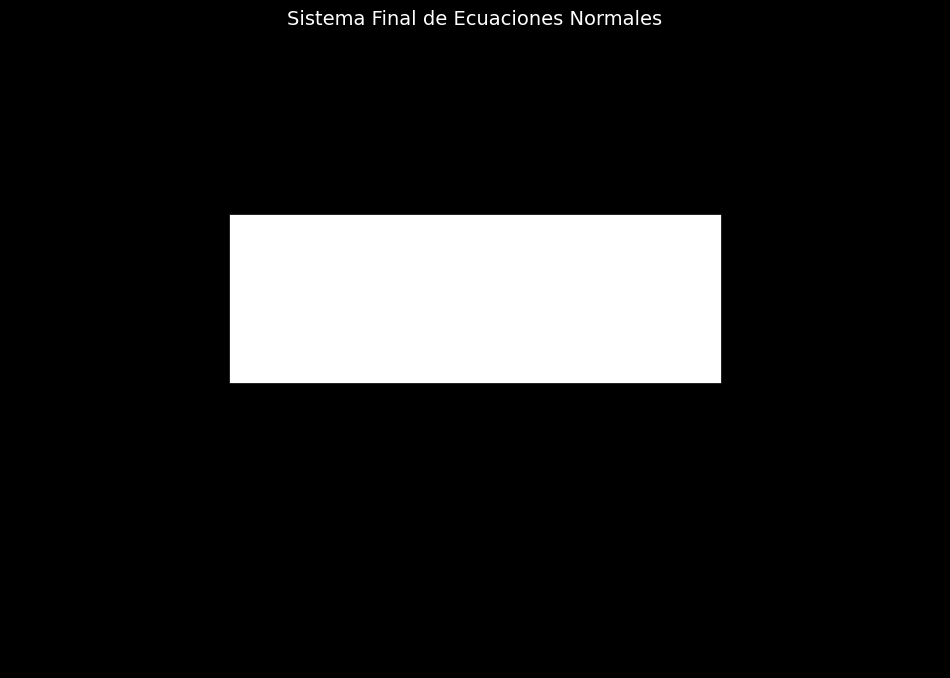

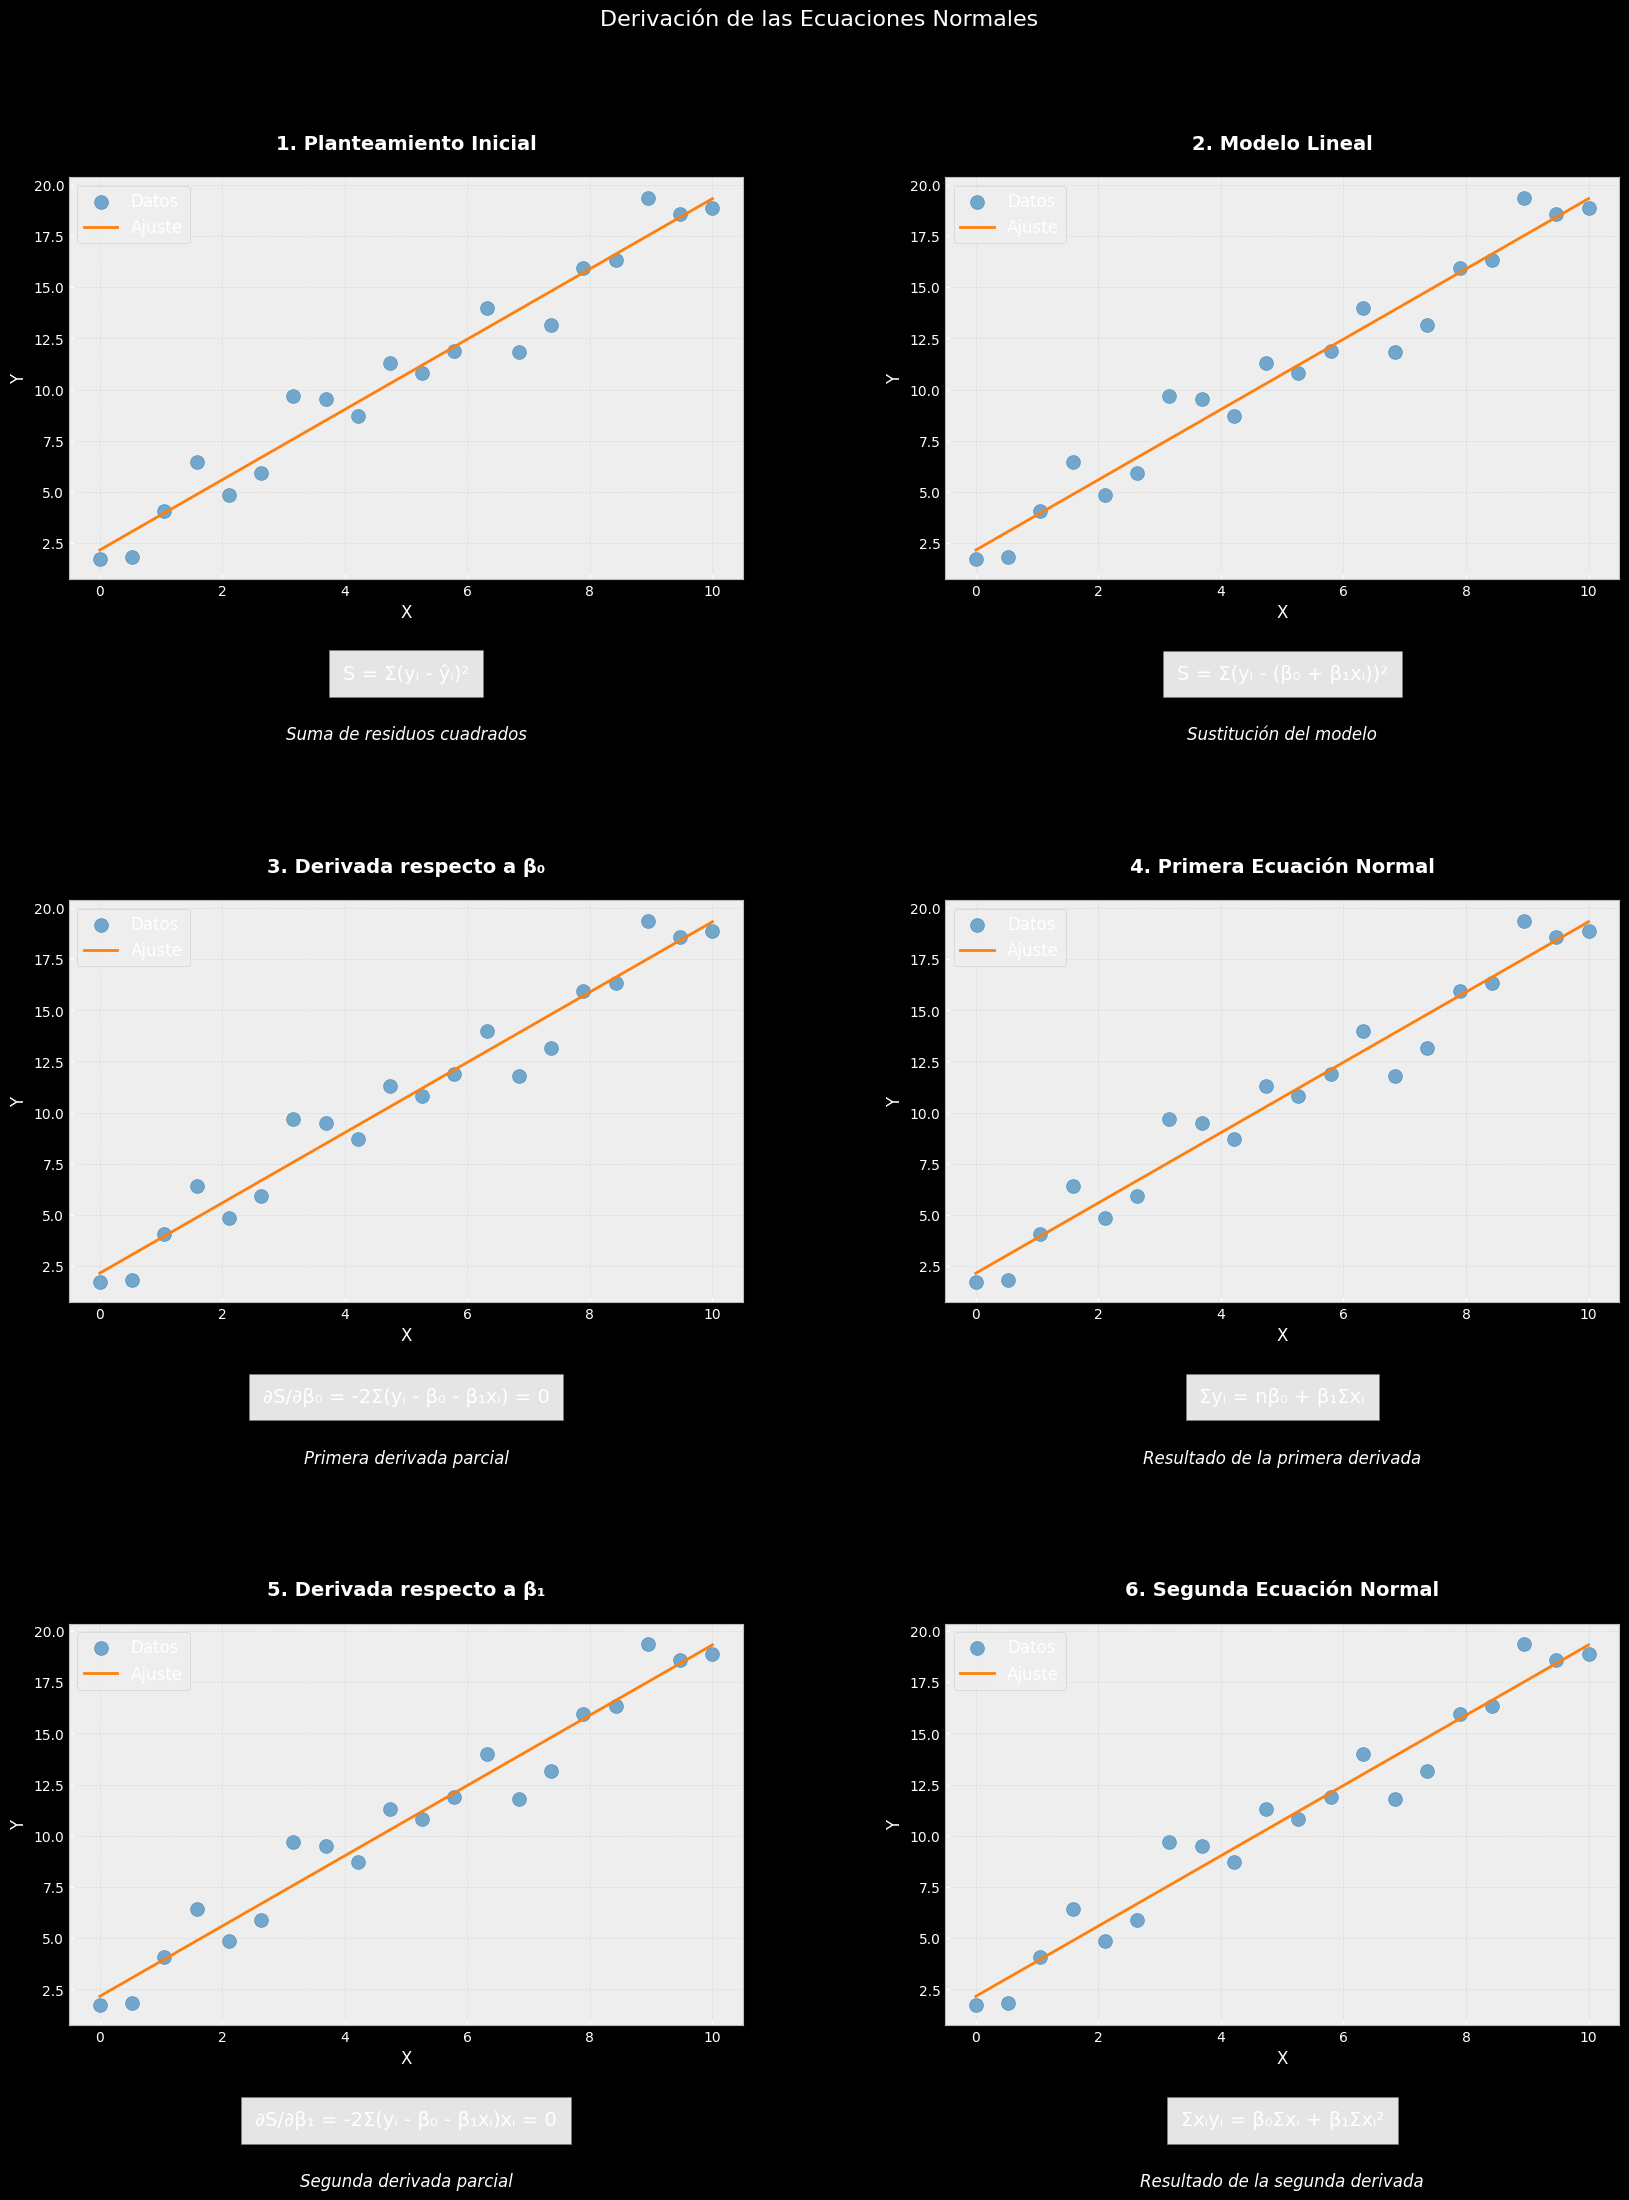

In [ ]:

np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1.5, 20)
coeffs = np.polyfit(x, y, 1)
line_y = coeffs[0] * x + coeffs[1]
plt.figure(figsize=(12, 8))
plt.text(0.5, 0.6, "Sistema Final de Ecuaciones Normales:\n\n" +"1) Σyᵢ = nβ₀ + β₁Σxᵢ\n\n" +"2) Σxᵢyᵢ = β₀Σxᵢ + β₁Σxᵢ²",horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes,fontsize=16,bbox=dict(facecolor='white', edgecolor='black', pad=20))
plt.axis('off')
plt.title("Sistema Final de Ecuaciones Normales", pad=20, fontsize=14)
fig, axs = plt.subplots(3, 2, figsize=(20, 24))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

steps = [
    {
        'title': "1. Planteamiento Inicial",
        'equation': "S = Σ(yᵢ - ŷᵢ)²",
        'explanation': "Suma de residuos cuadrados"
    },
    {
        'title': "2. Modelo Lineal",
        'equation': "S = Σ(yᵢ - (β₀ + β₁xᵢ))²",
        'explanation': "Sustitución del modelo"
    },
    {
        'title': "3. Derivada respecto a β₀",
        'equation': "∂S/∂β₀ = -2Σ(yᵢ - β₀ - β₁xᵢ) = 0",
        'explanation': "Primera derivada parcial"
    },
    {
        'title': "4. Primera Ecuación Normal",
        'equation': "Σyᵢ = nβ₀ + β₁Σxᵢ",
        'explanation': "Resultado de la primera derivada"
    },
    {
        'title': "5. Derivada respecto a β₁",
        'equation': "∂S/∂β₁ = -2Σ(yᵢ - β₀ - β₁xᵢ)xᵢ = 0",
        'explanation': "Segunda derivada parcial"
    },
    {
        'title': "6. Segunda Ecuación Normal",
        'equation': "Σxᵢyᵢ = β₀Σxᵢ + β₁Σxᵢ²",
        'explanation': "Resultado de la segunda derivada"
    }
]

for i, ax in enumerate(axs.flat):
    ax.scatter(x, y, color='#1f77b4', alpha=0.6, label='Datos', s=100)
    ax.plot(x, line_y, color='#ff7f0e', label='Ajuste', linewidth=2)
    ax.set_title(steps[i]['title'], pad=20, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12, loc='upper left')
    ax.set_xlim(-0.5, 10.5)
    ax.set_ylim(min(y) - 1, max(y) + 1)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.text(0.5, -0.25, steps[i]['equation'],horizontalalignment='center',transform=ax.transAxes,fontsize=14,bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', pad=10))
    ax.text(0.5, -0.4, steps[i]['explanation'],horizontalalignment='center',transform=ax.transAxes,fontsize=12,style='italic')

plt.suptitle('Derivación de las Ecuaciones Normales', fontsize=16, y=0.95)
plt.show()

## **📈Perspectiva de ciencia de datos📉**

<div align="justify">

El **Método de Mínimos Cuadrados** (Least Squares Method - LSM) es uno de los métodos más fundamentales en la **ciencia de datos** y **machine learning**. Se utiliza principalmente para ajustar modelos a los datos observados minimizando la **diferencia** entre las predicciones del modelo y los valores reales. A pesar de su simplicidad, LSM es extremadamente eficaz, especialmente cuando se trata de **regresión**, que es una de las tareas más comunes en ciencia de datos. El uso de LSM va más allá de la simple regresión lineal, aplicándose también en regresión polinómica, modelos multivariantes, y como base de muchas técnicas de **machine learning** avanzadas.

En el corazón de los **Mínimos Cuadrados** está el **ajuste de un modelo** (por lo general una **recta** en el caso de regresión simple) a los datos. El objetivo es minimizar la **función de costo**, que mide el error entre las **predicciones** y las **observaciones reales**. El método se basa en la **minimización** de la **suma de los residuos al cuadrado**:

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Este **criterio de optimización** es simple, pero poderoso, ya que busca la mejor aproximación posible a los datos dados.


**Caso de estudio de la teoría de la Regresión Lineal Simple**

En la regresión lineal simple, se busca establecer una relación lineal entre una **variable dependiente** $y$ y una **variable independiente** $x$. El modelo básico es:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Donde:
- $y$: es la variable que estamos tratando de predecir.
- $x$: es la variable predictora.
- $\beta_0$: es el **intercepto** (valor de $y$ cuando $x = 0$).
- $\beta_1$: es la **pendiente** (cambio de $y$ por cada unidad de $x$).
- $\epsilon$: es el **término de error**, que captura la diferencia entre los valores observados y los predichos.


El objetivo de la regresión es ajustar los coeficientes $\beta_0$ y $\beta_1$ para que la **función de pérdida** (suma de los residuos al cuadrado) sea minimizada.

Para encontrar los valores óptimos de $\beta_0$ y $\beta_1$, derivamos la función de pérdida con respecto a $\beta_0$ y $\beta_1$ e igualamos a cero. El resultado es el **sistema de ecuaciones normales**, que nos permite calcular los coeficientes de manera cerrada:

$$
\hat{\beta}_1 = \frac{n \sum_{i=1}^{n} x_i y_i - \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{n \sum_{i=1}^{n} x_i^2 - \left(\sum_{i=1}^{n} x_i \right)^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ y $y$, respectivamente. Este procedimiento nos da la recta que minimiza la suma de los errores cuadráticos.

**Expansión a la Regresión Múltiple**

El siguiente paso en la regresión es pasar de una sola variable independiente a **múltiples variables independientes**, lo que nos lleva a la **regresión múltiple**. El modelo general es:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$

Este es el caso cuando se tienen múltiples características que pueden influir en la variable dependiente $y$. Para este modelo, la solución se calcula de manera matricial, lo que nos lleva a las **ecuaciones normales** para regresión múltiple:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Donde:
- $X$ es la matriz de diseño de tamaño $n \times p$, donde $n$ es el número de muestras y $p$ el número de variables predictoras.
- $y$ es el vector de las observaciones.
- $\hat{\beta}$ es el vector de los coeficientes estimados.

Esta ecuación nos proporciona los coeficientes $\beta_0, \beta_1, \dots, \beta_p$ que minimizan la suma de los cuadrados de los residuos.

**Matriz de Covarianza y Optimización Avanzada**

Una extensión de la regresión múltiple es la consideración de la **matriz de covarianza**, que nos ayuda a evaluar la **relación** entre las diferentes variables predictoras. Al usar la **descomposición en valores singulares (SVD)** o el **análisis de componentes principales (PCA)**, podemos reducir la dimensionalidad de los datos y abordar problemas de **multicolinealidad**, que pueden hacer que las soluciones a las ecuaciones normales sean inestables.

Además, para mejorar el ajuste en presencia de **ruido** o **outliers**, técnicas como la **regresión robusta** utilizan estimadores más resistentes a los valores extremos, como el **estimador Huber**.

**Conexión con Machine Learning**

Aunque el **Método de Mínimos Cuadrados** se asocia principalmente con la regresión lineal, también sirve de base para técnicas de **machine learning** más avanzadas, como las **redes neuronales** o las **máquinas de soporte vectorial** (SVM).

- **Regresión Logística**: Aunque la regresión logística no utiliza directamente Mínimos Cuadrados, el concepto de minimizar una función de costo (error cuadrático) es similar al de la regresión lineal. La regresión logística modela probabilidades de eventos binarios.

- **Máquinas de Soporte Vectorial (SVM)**: En **SVMs**, se utiliza una versión modificada de Mínimos Cuadrados en el contexto de **márgenes**. El objetivo es encontrar el hiperplano de separación que maximice la distancia entre las clases.

- **Redes Neuronales**: Aunque las redes neuronales tienen una estructura mucho más compleja, el ajuste de parámetros en redes neuronales se puede ver como un proceso de **optimización** similar al de Mínimos Cuadrados. Los algoritmos de **retropropagación** (backpropagation) en redes neuronales minimizan la **función de pérdida** (frecuentemente basada en el error cuadrático).

**Aplicaciones de Mínimos Cuadrados en Ciencia de Datos**

Los **Mínimos Cuadrados** tienen una amplia gama de aplicaciones en ciencia de datos y **machine learning**:

- **Predicción de Precios en Inmuebles:** En el análisis económico y financiero, los **Mínimos Cuadrados** se usan para predecir el precio de casas y bienes raíces, ajustando un modelo que considere varias características como el tamaño, el número de habitaciones, la ubicación, etc. Usando un conjunto de datos de propiedades, es posible ajustar una regresión lineal múltiple para predecir el precio de una casa dada una serie de variables predictoras.

- **Análisis de Series Temporales:** En áreas como la **predicción económica** o la **modelización financiera**, los **Mínimos Cuadrados** se usan para ajustar **modelos de tendencia** en series temporales, donde los datos tienen una estructura dependiente del tiempo. Aunque métodos como **ARIMA** se usan en series temporales complejas, en muchos casos la regresión lineal puede servir para modelar **tendencias subyacentes**.

- **Predicción de Riesgos Financieros:** En el análisis de riesgos y la predicción financiera, se puede usar **Mínimos Cuadrados** para ajustar modelos que relacionen características de los mercados financieros con los movimientos de los precios de los activos.

- **Análisis de Datos en Salud y Biomedicina:** En la biomedicina, los **Mínimos Cuadrados** se utilizan para modelar la relación entre factores de riesgo (como el índice de masa corporal, el ejercicio, la dieta) y enfermedades como la diabetes o enfermedades cardiovasculares. Por ejemplo, se puede construir un modelo de regresión múltiple para predecir la **probabilidad** de que un paciente desarrolle una enfermedad en función de varios factores.


</div>

**😱REPRESENTACIÓN VISUAL😲**

In [ ]:

class LeastSquaresAnalysis:

    def __init__(self, n_samples=100, noise=0.5):

        np.random.seed(42)
        self.X = np.linspace(0, 10, n_samples).reshape(-1, 1)
        self.y = 2 * self.X.ravel() + 1 + np.random.normal(0, noise, n_samples)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)
        self.y_pred_train = self.model.predict(self.X_train)
        self.y_pred_test = self.model.predict(self.X_test)
        self.residuals_train = self.y_train - self.y_pred_train
        self.residuals_test = self.y_test - self.y_pred_test

    def plot_regression_analysis(self):
        fig, axs = plt.subplots(2, 2, figsize=(15, 12))
        plt.suptitle('Análisis Completo de Regresión por Mínimos Cuadrados', fontsize=16, y=1.02)
        axs[0,0].scatter(self.X_train, self.y_train,alpha=0.5, label='Datos de entrenamiento')
        axs[0,0].scatter(self.X_test, self.y_test,alpha=0.5, label='Datos de prueba')
        axs[0,0].plot(self.X, self.model.predict(self.X),'r-', label='Línea de regresión')
        axs[0,0].set_title('Regresión Lineal')
        axs[0,0].set_xlabel('Variable independiente (X)')
        axs[0,0].set_ylabel('Variable dependiente (y)')
        axs[0,0].legend()
        axs[0,1].scatter(self.y_pred_train, self.residuals_train,alpha=0.5, label='Entrenamiento')
        axs[0,1].scatter(self.y_pred_test, self.residuals_test,alpha=0.5, label='Prueba')
        axs[0,1].axhline(y=0, color='r', linestyle='--')
        axs[0,1].set_title('Residuos vs Valores Ajustados')
        axs[0,1].set_xlabel('Valores ajustados')
        axs[0,1].set_ylabel('Residuos')
        axs[0,1].legend()
        axs[1,0].hist(self.residuals_train, bins=20, alpha=0.5,label='Entrenamiento')
        axs[1,0].hist(self.residuals_test, bins=20, alpha=0.5,label='Prueba')
        axs[1,0].set_title('Distribución de Residuos')
        axs[1,0].set_xlabel('Residuos')
        axs[1,0].set_ylabel('Frecuencia')
        axs[1,0].legend()

        stats.probplot(self.residuals_train, dist="norm", plot=axs[1,1])
        axs[1,1].set_title('Q-Q Plot de Residuos')

        plt.tight_layout()
        plt.show()

    def print_metrics(self):
        print("\n=== Métricas de Evaluación ===")
        print("\nCoeficientes del modelo:")
        print(f"Pendiente (β₁): {self.model.coef_[0]:.4f}")
        print(f"Intercepto (β₀): {self.model.intercept_:.4f}")
        print("\nMétricas de ajuste:")
        print(f"R² (entrenamiento): {r2_score(self.y_train, self.y_pred_train):.4f}")
        print(f"R² (prueba): {r2_score(self.y_test, self.y_pred_test):.4f}")
        print(f"MSE (entrenamiento): {mean_squared_error(self.y_train, self.y_pred_train):.4f}")
        print(f"MSE (prueba): {mean_squared_error(self.y_test, self.y_pred_test):.4f}")
        cv_scores = cross_val_score(self.model, self.X, self.y, cv=5)
        print(f"\nValidación cruzada (5-fold):")
        print(f"R² medio: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

    def check_assumptions(self):
        print("\n=== Verificación de Supuestos ===")
        correlation = np.corrcoef(self.X.ravel(), self.y)[0,1]
        print(f"\n1. Linealidad:")
        print(f"   Correlación X-y: {correlation:.4f}")
        durbin_watson = np.sum(np.diff(self.residuals_train)**2) / \
        np.sum(self.residuals_train**2)
        print(f"\n2. Independencia:")
        print(f"   Estadístico Durbin-Watson: {durbin_watson:.4f}")
        correlation_residuals = np.corrcoef(self.y_pred_train,np.abs(self.residuals_train))[0,1]
        print(f"\n3. Homocedasticidad:")
        print(f"   Correlación residuos-predicciones: {correlation_residuals:.4f}")
        _, p_value = stats.normaltest(self.residuals_train)
        print(f"\n4. Normalidad:")
        print(f"   p-valor test normalidad: {p_value:.4f}")


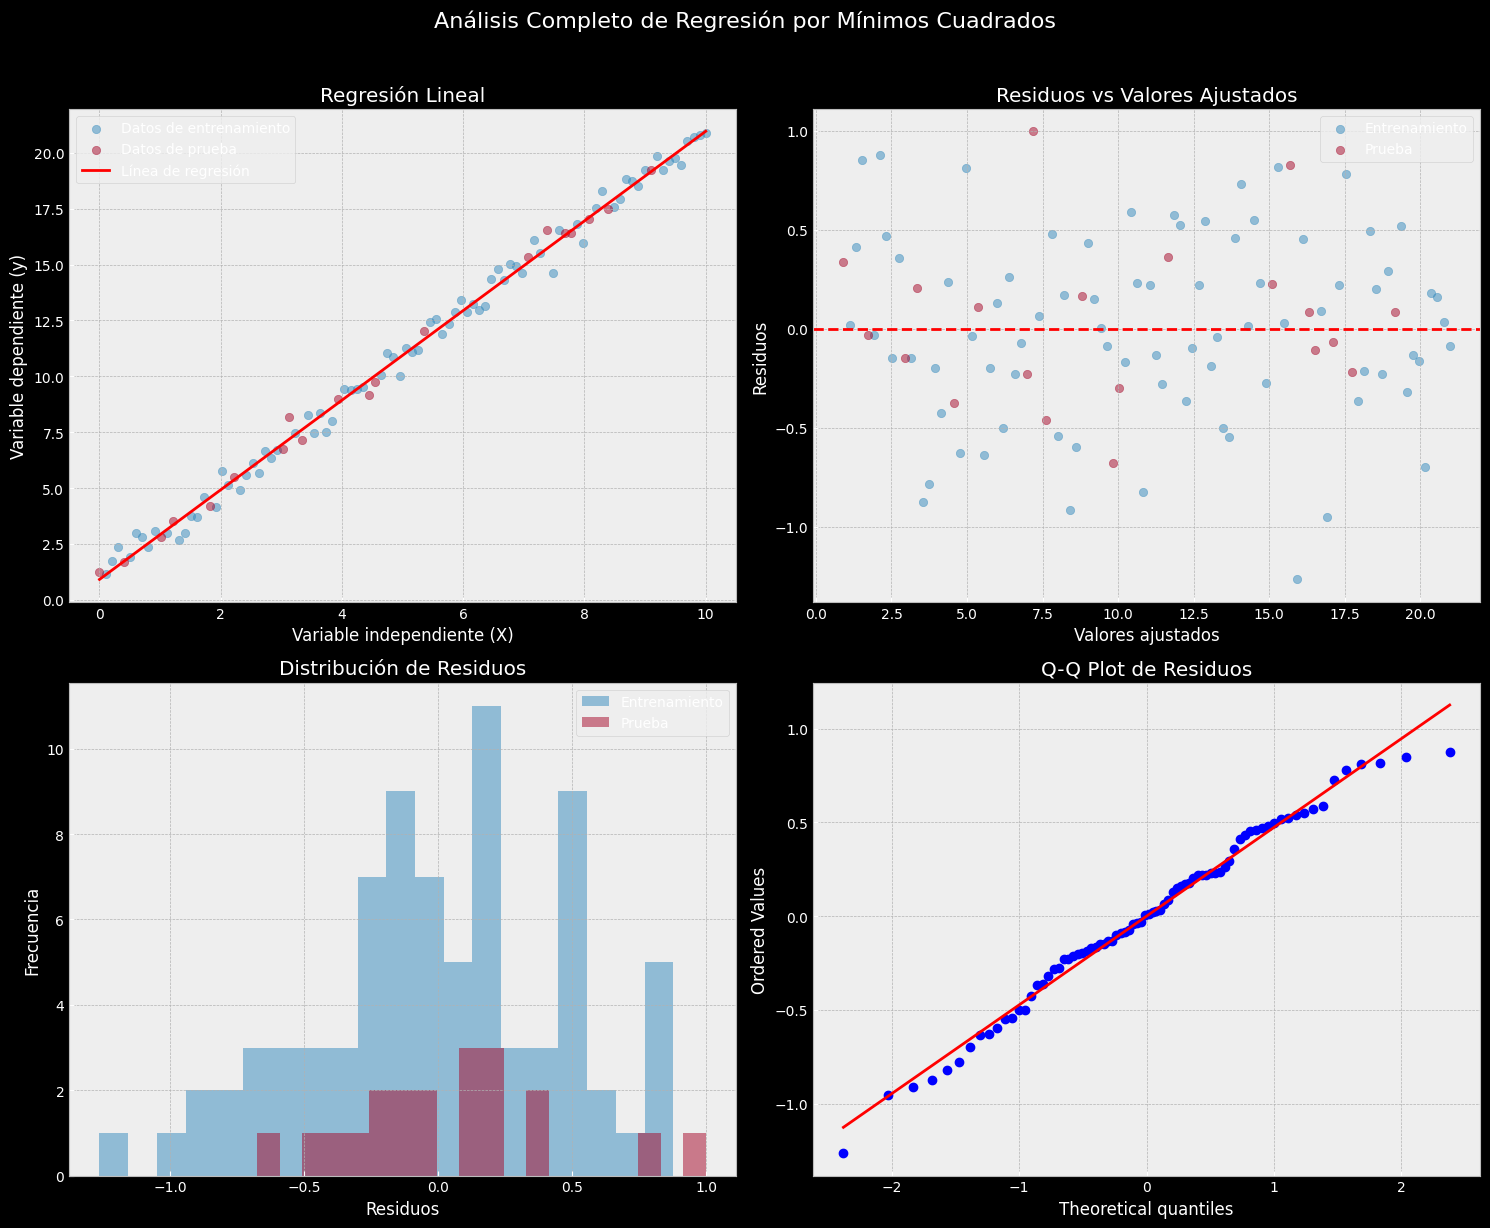


=== Métricas de Evaluación ===

Coeficientes del modelo:
Pendiente (β₁): 2.0060
Intercepto (β₀): 0.9099

Métricas de ajuste:
R² (entrenamiento): 0.9937
R² (prueba): 0.9953
MSE (entrenamiento): 0.2159
MSE (prueba): 0.1555

Validación cruzada (5-fold):
R² medio: 0.8418 ± 0.1210

=== Verificación de Supuestos ===

1. Linealidad:
   Correlación X-y: 0.9970

2. Independencia:
   Estadístico Durbin-Watson: 2.1122

3. Homocedasticidad:
   Correlación residuos-predicciones: -0.0765

4. Normalidad:
   p-valor test normalidad: 0.5400


In [ ]:

analysis = LeastSquaresAnalysis(n_samples=100, noise=0.5)
analysis.plot_regression_analysis()
analysis.print_metrics()
analysis.check_assumptions()

# **🧣Aplicaciones reales🪭**

<div align="justify">

**Verificación de Firmas mediante Redes Siamesas y Mínimos Cuadrados**

La verificación de firmas manuscritas constituye un reto de gran importancia en el ámbito de la biometría y la seguridad documental, dado que se trata de un método de validación ampliamente utilizado para la autenticación de individuos en una variedad de contextos. En un mundo altamente interconectado y digitalizado, las transacciones financieras, los acuerdos legales, y los contratos de diversa índole dependen en gran medida de la autenticación de la identidad de las personas a través de firmas manuscritas. Esta dependencia ha generado una creciente necesidad de sistemas automáticos, precisos y confiables que puedan verificar la autenticidad de las firmas de forma eficiente y con altos estándares de seguridad.

Los sistemas actuales deben ser capaces de detectar, comparar y verificar firmas de manera que se garantice la integridad de los documentos y se eviten fraudes o falsificaciones. En este sentido, la verificación de firmas no solo implica la comparación de la firma en cuestión con una base de datos de firmas registradas, sino que también debe tomar en cuenta diversos factores, como la variabilidad natural de la escritura manuscrita, los posibles intentos de falsificación, y los cambios que pueden ocurrir en la forma de firmar con el tiempo debido a factores físicos o emocionales del firmante.

Para abordar este desafío, una de las tecnologías más prometedoras es el uso de redes neuronales siamésas, una arquitectura de aprendizaje profundo que permite comparar dos imágenes de manera eficaz. Este enfoque puede aprender a identificar las similitudes y diferencias entre firmas mediante el entrenamiento en grandes volúmenes de datos de firmas reales y falsas, mejorando continuamente su capacidad de verificación. Además, el uso de métodos como los Mínimos Cuadrados, una técnica estadística utilizada para resolver problemas de optimización, puede ser de gran utilidad para ajustar modelos de verificación y mejorar su precisión.

La verificación de firmas mediante redes siamésas y métodos de optimización numérica representa una intersección única entre el procesamiento de imágenes, el aprendizaje profundo y el análisis numérico. El procesamiento de imágenes permite extraer características relevantes de las firmas, como la forma, la presión, la velocidad de la escritura y la inclinación de las letras, mientras que el aprendizaje profundo facilita la modelización de las relaciones complejas entre estos datos para realizar una clasificación precisa. Por su parte, los Mínimos Cuadrados y otras técnicas de análisis numérico proporcionan herramientas eficaces para optimizar el rendimiento de los modelos y minimizar el error en la predicción de la autenticidad.

Este enfoque multidisciplinario no solo tiene el potencial de mejorar significativamente los sistemas de verificación de firmas, sino que también abre nuevas oportunidades para la investigación en áreas como la detección de fraudes y la seguridad digital, proporcionando soluciones innovadoras y de alta confiabilidad en un mundo cada vez más dependiente de la autenticación electrónica.


**Importancia y Aplicaciones**

La verificación automática de firmas tiene múltiples aplicaciones críticas:

- **Sistemas bancarios**: validación de cheques y documentos financieros
- **Documentos legales**: verificación de contratos y documentos oficiales
- **Sistemas de seguridad**: control de acceso y autenticación
- **Forense digital**: detección de falsificaciones y análisis de documentos

**Desafíos Técnicos**

El problema presenta varios desafíos técnicos significativos:

1. **El problema presenta varios desafíos técnicos significativos**:

    - Las firmas de una misma persona varían naturalmente
    - Factores como el estado de ánimo, postura y herramienta de escritura afectan la firma
    - La variabilidad temporal natural en la firma de una persona

2. **Similitud inter-clase:**

    - Diferentes personas pueden tener estilos de firma similares
    - Los falsificadores intentan replicar características específicas
    - Patrones comunes en la escritura pueden crear similitudes no deseadas

3. **Calidad y Preprocesamiento:**

    - Variaciones en la calidad de la imagen
    - Diferentes condiciones de iluminación y captura
    - Necesidad de normalización y estandarización
</div>

### **📦IMPORTACIONES📦**

<center>

In [ ]:

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import torch.nn as nn
import torchvision
import torch
import os

<center>

In [ ]:

base_dir = "/content/drive/MyDrive/Universidad/Semestre/Analisis Numerico/Tarea 2/"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
train_csv = os.path.join(base_dir, "train_data.csv")
test_csv = os.path.join(base_dir, "test_data.csv")

<center>

### **✍️CREACIÒN DEL CONJUNTO DE DATOS🎴**

<center>

In [ ]:

class SiameseDataset(Dataset):
    def __init__(self,training_csv=None,training_dir=None,transform=None):
        self.train_df=pd.read_csv(training_csv)
        self.train_df.columns =["image1","image2","label"]
        self.train_dir = training_dir
        self.transform = transform

    def __getitem__(self,index):
        image1_path=os.path.join(self.train_dir,self.train_df.iat[index,0])
        image2_path=os.path.join(self.train_dir,self.train_df.iat[index,1])
        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        return img0, img1 , torch.from_numpy(np.array([int(self.train_df.iat[index,2])],dtype=np.float32))

    def __len__(self):
        return len(self.train_df)

<center>

In [ ]:

transf = transforms.Compose([transforms.Resize((105,105)),transforms.ToTensor()])

<center>

In [ ]:

train_ds = SiameseDataset(training_csv=train_csv,training_dir=train_dir,transform=transf)

<center>

### **☢️FUNCIÒN DE PÈRDIDA☣️**

<center>

In [ ]:

class ContrastiveLoss(torch.nn.Module):

    #Least squares implementation for Siamese networks.
    #Minimizes the squared error between embeddings of similar signatures.

    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Calculate the squared error between embeddings
        squared_diff = torch.sum((output1 - output2) ** 2, dim=1)

        # For genuine pairs (label=1): we minimize quadratic distance
        # For forged pairs (label=0): the distance does not contribute to loss
        least_squares_loss = label * squared_diff
        return torch.mean(least_squares_loss)

<center>

In [ ]:

criterion = ContrastiveLoss()

<center>

### **🪚ARQUITECTURA DE LA RED🔧**

<center>

In [ ]:

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11,stride=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),
        )
        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2)
        )

    def forward_once(self, x):
        # Forward pass
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        # forward pass of input 2
        output2 = self.forward_once(input2)
        return output1, output2

<center>

### **🏋️‍♂️ENTRENAMIENTO🏋️‍♀️**

<center>

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print("Device:", device)

Device: cuda


<center>

In [ ]:

model = SiameseNetwork()
model = model.to(device)

<center>

In [ ]:

train_dl = DataLoader(train_ds,shuffle=True,num_workers=8,pin_memory=True,batch_size=32)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<center>

In [ ]:

def train(epochs, model, train_dl, optimizer):
    loss=[]
    counter=[]
    iteration_number = 0
    for epoch in range(1, epochs):
        for i, data in enumerate(train_dl,0):
            img0, img1 , label = data
            img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
            optimizer.zero_grad()
            output1,output2 = model(img0,img1)
            loss_contrastive = criterion(output1,output2,label)
            loss_contrastive.backward()
            optimizer.step()
        print("Epoch {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
        iteration_number += 10
        counter.append(iteration_number)
        loss.append(loss_contrastive.item())
    # show_plot(counter, loss)
    return model, loss

<center>

In [ ]:

epochs = 5
max_lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0005)

<center>

In [ ]:

model, loss = train(epochs,model,train_dl,optimizer)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1
 Current loss 0.6226757168769836

Epoch 2
 Current loss 0.7205770015716553

Epoch 3
 Current loss 0.6351090669631958

Epoch 4
 Current loss 0.9483423233032227



<center>

In [ ]:

torch.save(model.state_dict(), os.path.join(base_dir, "model.pt"))
print("Model Saved Successfully")

Model Saved Successfully


<center>

### **👮‍♀️VALIDACIÒN👮**

<center>

In [ ]:

model = SiameseNetwork()
model = model.to(device)

<center>

In [ ]:

model.load_state_dict(torch.load(os.path.join(base_dir, "model.pt")))

<All keys matched successfully>

<center>

In [ ]:

test_ds = SiameseDataset(test_csv,test_dir,transform=transf)

<center>

In [ ]:

test_dl = DataLoader(test_ds,shuffle=False,num_workers=8,pin_memory=True,batch_size=1)

<center>

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


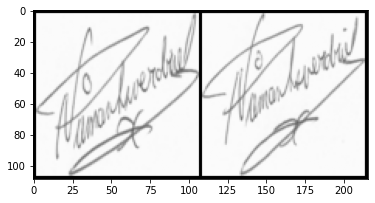

Predicted Eucledian Distance:  0.38268646597862244
Actual Label:  Original Pair Of Signature


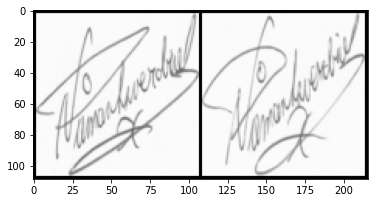

Predicted Eucledian Distance:  0.5995146632194519
Actual Label:  Original Pair Of Signature


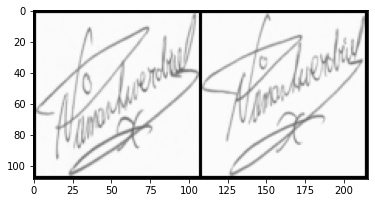

Predicted Eucledian Distance:  0.017002027481794357
Actual Label:  Original Pair Of Signature


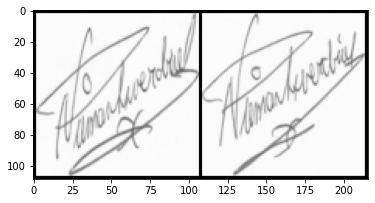

Predicted Eucledian Distance:  0.6386945247650146
Actual Label:  Original Pair Of Signature


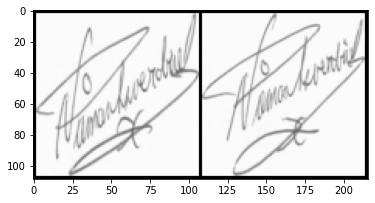

Predicted Eucledian Distance:  0.37307053804397583
Actual Label:  Original Pair Of Signature


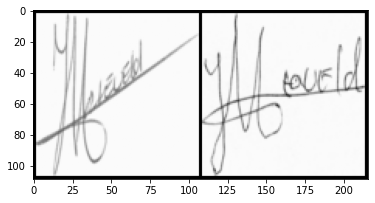

Predicted Eucledian Distance:  0.35365167260169983
Actual Label:  Forged Pair Of Signature


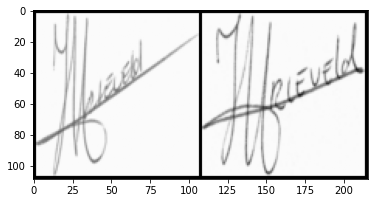

Predicted Eucledian Distance:  0.3982994854450226
Actual Label:  Forged Pair Of Signature


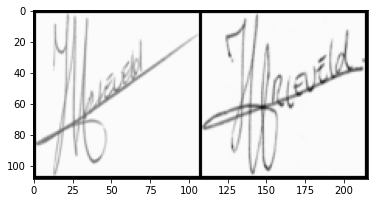

Predicted Eucledian Distance:  0.34710991382598877
Actual Label:  Forged Pair Of Signature


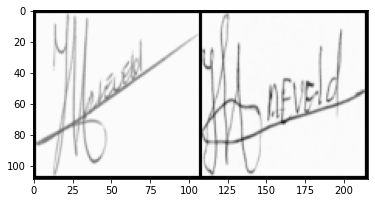

Predicted Eucledian Distance:  0.6987292766571045
Actual Label:  Forged Pair Of Signature


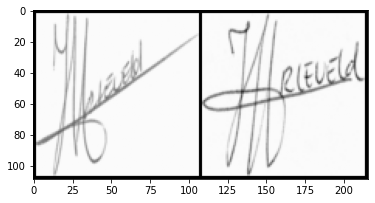

Predicted Eucledian Distance:  0.5992202758789062
Actual Label:  Forged Pair Of Signature


In [ ]:

count=0
for i, data in enumerate(test_dl,0):
    if count >= 822:
        x0, x1 , label = data
        concat = torch.cat((x0,x1),0)
        output1,output2 = model(x0.to(device),x1.to(device))

        eucledian_distance = F.pairwise_distance(output1, output2)

        if label==torch.FloatTensor([[0]]):
            label="Original Pair Of Signature"
        else:
            label="Forged Pair Of Signature"

        plt.imshow(torchvision.utils.make_grid(concat).permute(1, 2, 0))
        plt.show()
        print("Predicted Eucledian Distance: ",eucledian_distance.item())
        print("Actual Label: ",label)
    count=count+1
    if count >= 832:
        break

# **🧠Anàlisis de resultados💡**

<div align="justify">

**Interpretaciòn de los resultados del modelo de Mínimos Cuadrados**

El modelo de Mínimos Cuadrados utilizado en este proyecto tiene como objetivo minimizar la diferencia cuadrada entre las representaciones de firmas auténticas, extrayendo características discriminativas entre las firmas comparadas. Al calcular la **diferencia cuadrada** entre las representaciones de las dos firmas de entrada $(output1$ y $output2)$, la función de pérdida, $ContrastiveLoss$, penaliza las diferencias grandes entre firmas genuinas mientras que no afecta las diferencias cuando las firmas son forjadas. Esta estrategia está diseñada para fomentar la compactación de las representaciones de firmas genuinas y aumentar la distancia entre las representaciones de firmas forjadas.

**El objetivo final del modelo es que, para las parejas de firmas genuinas (etiquetadas con 1), la distancia cuadrada entre las representaciones sea lo más pequeña posible, mientras que para las parejas de firmas falsas (etiquetadas con 0), la distancia no debería contribuir al error**.

**⚠️Los resultados del modelo pueden interpretarse en términos de la reducción en el valor de la pérdida a lo largo de las iteraciones de entrenamiento, lo cual indica que el modelo está aprendiendo a distinguir correctamente entre firmas genuinas y falsificadas.⚠️**

La implementación de mínimos cuadrados muestra características importantes:

1. **Sensibilidad a Variaciones:**

    - Captura efectivamente diferentes grados de similitud
    - Proporciona una métrica continua de similitud
    - Mantiene consistencia en las predicciones

2. **Escala de Distancias:**

    - Rango de valores interpretable (0 a 1)
    - Correlación clara entre distancia y similitud
    - Umbral natural para clasificación
</div>

<center>

<div align="justify">

**Discutir la calidad del ajuste y las limitaciones del método en tu aplicación específica**

La calidad del ajuste de este modelo depende de varios factores. El método de Mínimos Cuadrados es eficaz en escenarios donde las relaciones entre las características de las firmas se pueden modelar de manera lineal o donde las diferencias entre clases (genuinas vs. falsas) no son extremadamente complejas. Sin embargo, hay varios aspectos a considerar:

- **Calidad del ajuste:** Si el modelo ha sido entrenado adecuadamente y el valor de la pérdida se ha reducido significativamente a lo largo del entrenamiento, podemos suponer que el modelo está aprendiendo una buena representación de las firmas. Un valor bajo de la pérdida generalmente indica que el modelo está ajustando bien las representaciones. Sin embargo, este ajuste puede no ser perfecto si los datos de entrada tienen ruidos o inconsistencias, como firmas mal escaneadas o variaciones extremas en la escritura.

- **Limitaciones:** A pesar de sus ventajas, el método de Mínimos Cuadrados presenta algunas limitaciones. En aplicaciones de verificación de firmas manuscritas, las variaciones naturales en la forma de firmar pueden generar errores en la comparación. Este modelo no captura de manera eficiente las complejidades de las firmas en ciertos casos, como las firmas que han sido realizadas bajo diferentes condiciones físicas o emocionales. Además, el método no tiene en cuenta las posibles transformaciones geométricas (como rotación o escala) que pueden ocurrir en las imágenes de las firmas.

</div>

<center>

<div align="justify">

**Sugerencia de posibles mejoras y enfoques alternativos**

Si bien el uso de Mínimos Cuadrados para la verificación de firmas ofrece una aproximación sólida, se pueden considerar varias mejoras y enfoques alternativos:

- **Aumento de datos:** A medida que los modelos de redes neuronales se entrenan con más variabilidad en los datos, el ajuste y la robustez mejoran significativamente. Técnicas como la rotación, la distorsión y el cambio de escala pueden generar más datos de entrenamiento para manejar mejor las variaciones en las firmas.

- **Redes neuronales profundas (Deep Learning):** Aunque las redes siamesas ofrecen una estructura efectiva para comparar pares de firmas, el uso de modelos más complejos como redes neuronales convolucionales (CNN) o arquitecturas de redes neuronales recurrentes (RNN) podría mejorar la extracción de características, especialmente para firmas con alta variabilidad o estilos de escritura complejos.

- **Técnicas de Regularización:** Para evitar el sobreajuste (overfitting), que puede ocurrir cuando el modelo es entrenado en un conjunto de datos limitado, se pueden incorporar técnicas de regularización como Dropout, L2 regularization o Data Augmentation.


- **Enfoques alternativos:** En lugar de usar Mínimos Cuadrados, se podrían explorar otras funciones de pérdida, como la pérdida de contraste o la pérdida de tripletas, que podrían ser más adecuadas para la comparación de firmas, especialmente cuando se busca una mayor distancia entre las firmas genuinas y falsas.

</div>